In [1]:
from sklearn import datasets
data=datasets.load_diabetes()

In [2]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
import pandas as pd
df=pd.DataFrame(data.data , columns=data.feature_names)
df['target']=pd.Series(data.target)

In [4]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [8]:
df[df.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


In [9]:
y=df['target']
X=df.drop('target' , axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test=train_test_split(X,y, test_size=0.20, random_state=0)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=500)

gbr.fit(X_train , y_train)

GradientBoostingRegressor(n_estimators=500)

In [13]:
y_pred=gbr.predict(X_test)
print(y_pred)

[256.53686144 205.56289125 179.85705675 136.31592241 212.97766292
 226.13396728 101.15855487 214.57708437 110.13577811 260.02278189
 200.07903345 149.83381635 122.49767269  93.72752111 308.01687012
 100.26761301 146.4640915   55.63856138  94.21060744 256.47059022
 153.24568304 127.54205669 187.25970754 146.55660359 213.07718057
 186.68199607 147.64076031  66.80739609 273.02793001 130.45776209
 214.2533022   81.59559227 150.79557459 158.95375957 150.69190253
 169.9475825  176.4382179  120.11136791  98.22209211 195.91362202
 119.29752099 147.65873841  94.68295302 183.96050259 153.01676467
  88.9211124  122.85298779 118.84166227  77.1481149  284.71584748
 138.69950885  44.89671182 133.24314078 164.55665853 241.48431364
 162.22648217 204.87884266 124.80532768  90.25600828 183.34060951
 250.40271738 156.79067317 125.6020672   81.66241263 262.75076351
 150.68307123  85.48633701 279.34193423 230.40587009 110.64529379
  83.19528735 144.36098797 133.06639333 125.82209324 131.51616462
 144.84492

In [14]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_pred , y_test)
print(mae)

51.96748117627635


In [16]:
feature_scores=pd.Series(gbr.feature_importances_ , index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

s5     0.384262
bmi    0.213969
bp     0.092537
s2     0.079042
s6     0.054731
s3     0.052260
age    0.045358
s1     0.042100
s4     0.019620
sex    0.016121
dtype: float64


Text(0, 0.5, 'Features')

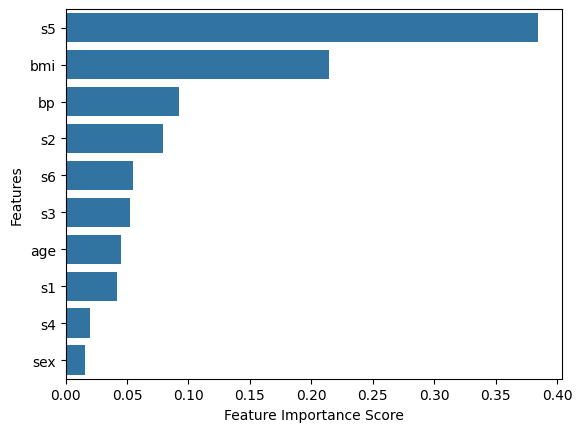

In [17]:
sns.barplot(x=feature_scores , y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

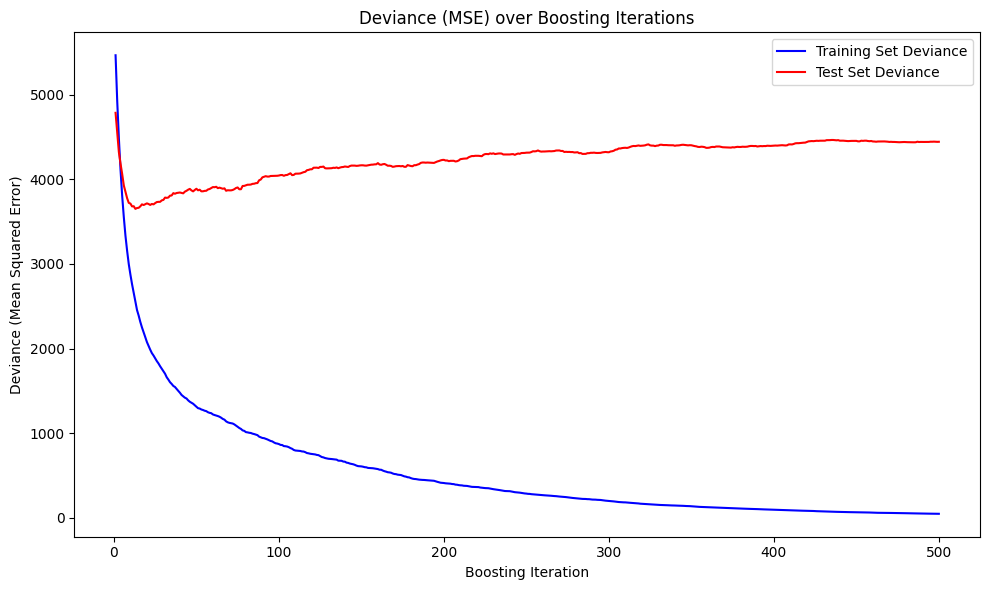

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

test_score = np.zeros((500,), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10,6))
plt.title("Deviance (MSE) over Boosting Iterations")

plt.plot(np.arange(500) + 1, gbr.train_score_, 'b-', label="Training Set Deviance")
plt.plot(np.arange(500) + 1, test_score, 'r-', label="Test Set Deviance")

plt.xlabel("Boosting Iteration")
plt.ylabel("Deviance (Mean Squared Error)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
